In [1]:
import pandas as pd

url = "train.csv"
df = pd.read_csv(url , nrows=10000)

print("Campos que compõem cada registro:")
print(df.columns)

df.head()


Campos que compõem cada registro:
Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [2]:
print("Labels das classes existentes:")
print(df['Customer Type'].unique())

print("Quantidade de registros por classe:")
print(df['Customer Type'].value_counts())


Labels das classes existentes:
['Loyal Customer' 'disloyal Customer']
Quantidade de registros por classe:
Customer Type
Loyal Customer       8205
disloyal Customer    1795
Name: count, dtype: int64


In [3]:
print("Quantidade de registros por número de labels:")
df['Customer Type'].value_counts()


Quantidade de registros por número de labels:


Customer Type
Loyal Customer       8205
disloyal Customer    1795
Name: count, dtype: int64

In [4]:
with_labels = df['Customer Type'].notna().sum()
without_labels = df['Customer Type'].isna().sum()

print(f"Quantidade de registros com labels: {with_labels}")
print(f"Quantidade de registros sem labels: {without_labels}")



Quantidade de registros com labels: 10000
Quantidade de registros sem labels: 0


In [5]:
df['Has_Label'] = df['Customer Type'].notnull().astype(int)

df[['Customer Type', 'Has_Label']].head()


,Customer Type,Has_Label
0,Loyal Customer,1
1,disloyal Customer,1
2,Loyal Customer,1
3,Loyal Customer,1
4,Loyal Customer,1


In [6]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados: {duplicated}")

df_clean = df.drop_duplicates()

print(f"Total de registros após remoção de duplicados: {df_clean.shape[0]}")


Registros duplicados: 0
Total de registros após remoção de duplicados: 10000


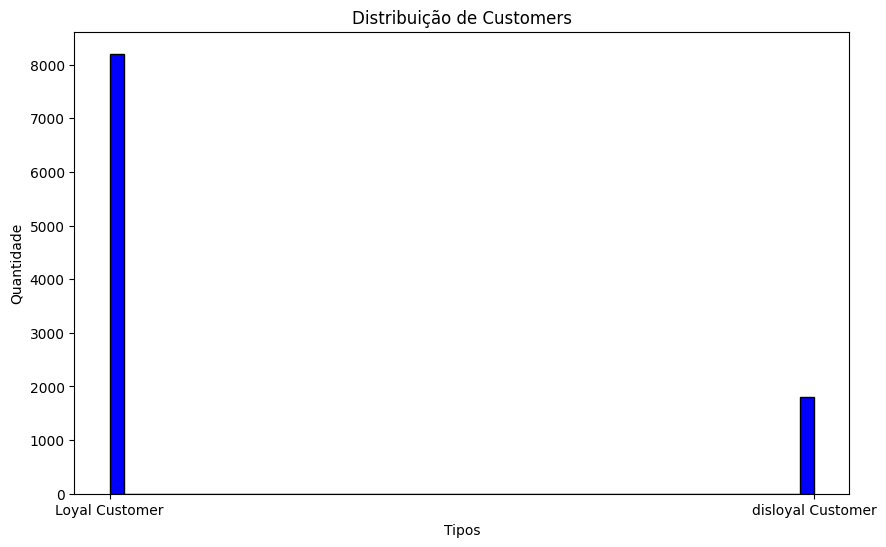

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_clean['Customer Type'], bins=50, color='blue', edgecolor='black')
plt.title('Distribuição de Customers')
plt.xlabel('Tipos')
plt.ylabel('Quantidade')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

# Definir as features (X) e o alvo (y)
X = df_clean.drop(columns=['Customer Type'])  # Todas as colunas menos o alvo
y = df_clean['Customer Type']  # Variável alvo

# Dividir os dados em conjunto de treinamento, validação e teste (80% treino, 10% validação, 10% teste)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Tamanho do conjunto de treinamento: {len(X_train)}")
print(f"Tamanho do conjunto de validação: {len(X_val)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")



Tamanho do conjunto de treinamento: 8000
Tamanho do conjunto de validação: 1000
Tamanho do conjunto de teste: 1000


In [9]:
# Verificar se existem valores nulos
print("Valores nulos no conjunto:")
print(df_clean.isnull().sum())

# Exemplo de tratamento para colunas numéricas:
for col in df_clean.select_dtypes(include='number').columns:
    df_clean[col].fillna(df_clean[col].mean(), inplace=True)

# Exemplo de tratamento para colunas categóricas:
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# Verificar novamente se há valores nulos
print("Valores nulos após o tratamento:")
print(df_clean.isnull().sum())


Valores nulos no conjunto:
Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             26
satisfaction 

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_27392\3895873750.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mean(), inplace=True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_27392\3895873750.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

Micro F1 Score: 0.56
Macro F1 Score: 0.50


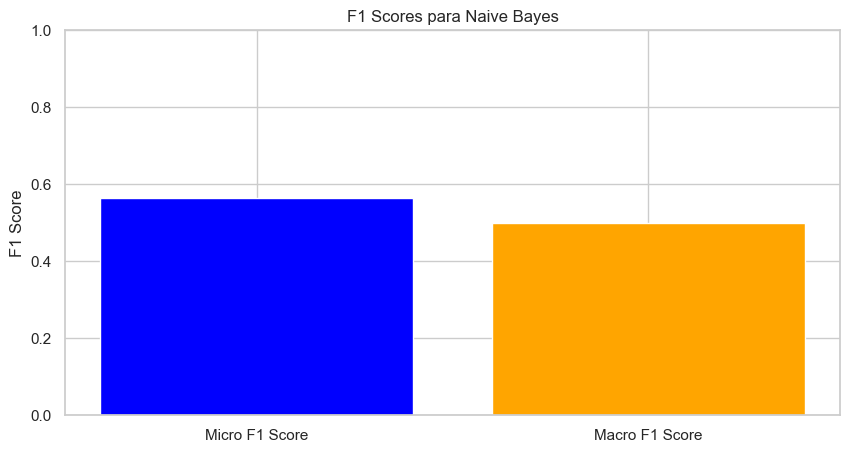

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Codificar variáveis categóricas
for col in df_clean.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])

# Definir features (X) e o alvo (y)
X = df_clean.drop(columns=['Customer Type'])  # Todas as colunas menos o alvo
y = df_clean['Customer Type']  # Variável alvo

# Dividir os dados em conjunto de treinamento, validação e teste 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Ajustar o modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Fazer previsões
y_pred_val = nb_model.predict(X_val)

# Calcular F1 scores
micro_f1 = f1_score(y_val, y_pred_val, average='micro')
macro_f1 = f1_score(y_val, y_pred_val, average='macro')

# Exibir resultados
print(f'Micro F1 Score: {micro_f1:.2f}')
print(f'Macro F1 Score: {macro_f1:.2f}')

# Plotar os resultados
sns.set(style='whitegrid')
plt.figure(figsize=(10, 5))
plt.bar(['Micro F1 Score', 'Macro F1 Score'], [micro_f1, macro_f1], color=['blue', 'orange'])
plt.ylabel('F1 Score')
plt.title('F1 Scores para Naive Bayes')
plt.ylim(0, 1)
plt.show()


In [11]:
df_clean['Arrival Delay in Minutes'].fillna(df_clean['Arrival Delay in Minutes'].mean(), inplace=True)


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_27392\3207368294.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Arrival Delay in Minutes'].fillna(df_clean['Arrival Delay in Minutes'].mean(), inplace=True)


In [12]:
import torch
from transformers import GPT2Tokenizer, GPT2Model
import faiss
import numpy as np

# Certifique-se de usar GPU

# Inicializar o tokenizer e o modelo do GPT-2
tokenizer = GPT2Tokenizer.from_pretrained("miguelvictor/python-gpt2-large")
model = GPT2Model.from_pretrained("miguelvictor/python-gpt2-large")

# Adicionar um token de padding
tokenizer.pad_token = tokenizer.eos_token  # Usar o token de fim de sequência como token de padding

def get_embeddings(texts, batch_size=8):  # Tente um batch_size ainda menor
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=50)
        inputs = {key: val for key, val in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
        all_embeddings.append(embeddings)
    return np.vstack(all_embeddings)

In [13]:
train_embeddings = np.load('train_embeddings.npy')
val_embeddings = np.load('val_embeddings.npy')

index = faiss.IndexFlatL2(train_embeddings.shape[1])  # Criar um índice
index.add(train_embeddings)  # Adicionar embeddings de treinamento

k = 5  # Defina o número de vizinhos
D, I = index.search(val_embeddings, k) 

# Exibir resultados
print("Distâncias das K amostras mais semelhantes:")
print(D)
print("Índices das K amostras mais semelhantes:")
print(I)

Distâncias das K amostras mais semelhantes:
[[21.352661 21.484253 21.831177 22.079346 22.567017]
 [27.047485 30.105652 30.796509 31.377075 31.620483]
 [ 9.654144 10.869141 12.638062 13.305176 14.903137]
 ...
 [20.74408  21.6167   22.35083  23.006409 23.221313]
 [21.791077 21.804077 22.584412 22.603882 23.705841]
 [25.219116 26.21228  26.670715 26.888428 28.565308]]
Índices das K amostras mais semelhantes:
[[ 239 6634  913 3010 6127]
 [2250 2411 1477  947 5850]
 [6777 5239 3494 5544 4975]
 ...
 [5949  415 3222 5722 5510]
 [5533 1440 5650 5036 1946]
 [2358 3605 5269 4417 7776]]


In [14]:
k = 5
query_idx = 0 
nearest_indices = I[query_idx, :] 

nearest_records = df.iloc[nearest_indices].reset_index(drop=True)

print(nearest_records.head(5))


   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0         239  15174    Male  disloyal Customer   23  Business travel   
1        6634  71200  Female     Loyal Customer   23  Business travel   
2         913  25090  Female     Loyal Customer   38  Business travel   
3        3010  61362  Female     Loyal Customer   22  Business travel   
4        6127  31503    Male     Loyal Customer   55  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              416                      5   
1  Business             3679                      2   
2  Business             1947                      5   
3  Business             2405                      2   
4       Eco              846                      2   

   Departure/Arrival time convenient  ...  On-board service  Leg room service  \
0                                  0  ...                 3                 5   
1                                  2  ...                 5         